In [49]:
# Install necessary libraries
!pip install pandas scikit-learn

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Download NLTK resources
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
dataset_url = 'https://raw.githubusercontent.com/Shahroz-Harral/Sentiment_Analysis/main/Code/kaggle%20airline%20tweets%20data%20set/Tweets.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_url)

Mounted at /content/drive


In [3]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove '@' and '#' symbols
    text = re.sub(r'[@#]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Apply stemming
    text = ' '.join([ps.stem(word) for word in text.split()])

    return text

# Apply preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Preprocess the data
# For simplicity, we'll use only the 'text' column for sentiment analysis
X = df['text']
y = df['airline_sentiment']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Split the data into training and testing sets using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [19]:
# Train a Naive Bayes model using CountVectorizer (MultinomialNB)
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set using CountVectorizer
predictions = naive_bayes_model.predict(X_test_vectorized)

# Evaluate the model using CountVectorizer
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Display the evaluation metrics for CountVectorizer and MultinomialNB
print("CountVectorizer Results (MultinomialNB):")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


CountVectorizer Results (MultinomialNB):
Accuracy: 0.78

Confusion Matrix:
[[1803   64   22]
 [ 325  215   40]
 [ 157   40  262]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.95      0.86      1889
     neutral       0.67      0.37      0.48       580
    positive       0.81      0.57      0.67       459

    accuracy                           0.78      2928
   macro avg       0.76      0.63      0.67      2928
weighted avg       0.77      0.78      0.76      2928



In [20]:
# Train a Naive Bayes model using CountVectorizer (BernoulliNB)
naive_bayes_model = BernoulliNB()
naive_bayes_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set using CountVectorizer
predictions = naive_bayes_model.predict(X_test_vectorized)

# Evaluate the model using CountVectorizer
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Display the evaluation metrics for CountVectorizer and MultinomialNB
print("CountVectorizer Results (BernoulliNB):")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

CountVectorizer Results (BernoulliNB):
Accuracy: 0.76

Confusion Matrix:
[[1815   62   12]
 [ 348  212   20]
 [ 200   63  196]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.96      0.85      1889
     neutral       0.63      0.37      0.46       580
    positive       0.86      0.43      0.57       459

    accuracy                           0.76      2928
   macro avg       0.75      0.58      0.63      2928
weighted avg       0.75      0.76      0.73      2928



In [21]:
# Train a Naive Bayes model using CountVectorizer (ComplementNB)
naive_bayes_model = ComplementNB()
naive_bayes_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set using CountVectorizer
predictions = naive_bayes_model.predict(X_test_vectorized)

# Evaluate the model using CountVectorizer
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Display the evaluation metrics for CountVectorizer and MultinomialNB
print("CountVectorizer Results (ComplementNB):")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

CountVectorizer Results (ComplementNB):
Accuracy: 0.79

Confusion Matrix:
[[1720   88   81]
 [ 234  259   87]
 [  81   46  332]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      1889
     neutral       0.66      0.45      0.53       580
    positive       0.66      0.72      0.69       459

    accuracy                           0.79      2928
   macro avg       0.72      0.69      0.70      2928
weighted avg       0.78      0.79      0.78      2928



In [51]:
# Train and evaluate GaussianNB using CountVectorizer
naive_bayes_gaussian = GaussianNB()
naive_bayes_gaussian.fit(X_train_vectorized.toarray(), y_train)
predictions_gaussian = naive_bayes_gaussian.predict(X_test_vectorized.toarray())
accuracy_gaussian = accuracy_score(y_test, predictions_gaussian)
conf_matrix_gaussian = confusion_matrix(y_test, predictions_gaussian)
classification_rep_gaussian = classification_report(y_test, predictions_gaussian)

precision_gaussian = precision_score(y_test, predictions_gaussian, average='macro')
recall_gaussian = recall_score(y_test, predictions_gaussian, average='macro')
f1_gaussian = f1_score(y_test, predictions_gaussian, average='macro')

# Display the evaluation metrics for CountVectorizer and GaussianNB
print("\nCountVectorizer Results (GaussianNB):")
print(f"Accuracy: {accuracy_gaussian:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_gaussian)
print("\nClassification Report:")
print(classification_rep_gaussian)
print(f"Precision: {precision_gaussian}")
print(f"Recall: {recall_gaussian}")
print(f"F1-score: {f1_gaussian}")


CountVectorizer Results (GaussianNB):
Accuracy: 0.48

Confusion Matrix:
[[941 383 565]
 [131 173 276]
 [ 80  77 302]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.50      0.62      1889
     neutral       0.27      0.30      0.29       580
    positive       0.26      0.66      0.38       459

    accuracy                           0.48      2928
   macro avg       0.45      0.48      0.43      2928
weighted avg       0.62      0.48      0.51      2928

Precision: 0.4514529961376274
Recall: 0.48479169986646636
F1-score: 0.4270490942441398


### Improving the accuracy
We have tried using different n-grams and different Naive Bayes models but maximum accuracy lingers arround 60%. In order to improve our model let's try to change the way the BOW is created. Currently we created BOW with CountVectorizer which counts the occurance of the word in the text. More number of time a word occurs it becomes more important for classification.


### TF-IDF: Term Frequency-Inverse Document Frequency
Let's use TF-IDF here product of term frequency and inverse document frequency is used. Term frequency is how frequently a terms has appeared in a document. Let's say a term appears f times in a document with d words. <br>
Term Frequency = f/d <br>
IDF is inverse document frequency. If a corpus contains N documents and the term of our interest appears only in D documents then IDF is:<br>
IDF = log(N/D)
TF-IDF is product of Term Frequncy and Inverse Document Frequency. <b>TF-IDF shows the rarity of a word in the corpus.</b> If a word is rare then probably its a signature word for a particular sentiment/information.  

In [42]:
#tfidf = TfidfVectorizer()
#text_count_2 = tfidf.fit_transform(df['text'])

In [43]:
# Convert text data to numerical data using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [44]:
from sklearn import metrics
MNB = MultinomialNB()
BNB = BernoulliNB()
CNB = ComplementNB()
GNB = GaussianNB()




In [55]:



#defining the model
#compilimg the model -> we are going to use already used models GNB, MNB, CNB, BNB
#fitting the model
MNB.fit(X_train_tfidf, y_train)

accuracy_score_mnb = metrics.accuracy_score(MNB.predict(X_test_tfidf), y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, MNB.predict(X_test_tfidf.toarray()))
print("\nClassification Report MNB:")
print(classification_rep)

BNB.fit(X_train_tfidf, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(X_test_tfidf), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, BNB.predict(X_test_tfidf.toarray()))
print("\nClassification Report BNB:")
print(classification_rep)

CNB.fit(X_train_tfidf, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(X_test_tfidf), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, CNB.predict(X_test_tfidf.toarray()))
print("\nClassification Report CNB:")
print(classification_rep)

GNB.fit(X_train_tfidf.toarray(), y_train)
accuracy_score_gnb = metrics.accuracy_score(GNB.predict(X_test_tfidf.toarray()), y_test)
print('accuracy_score_gnb = '+str('{:4.2f}'.format(accuracy_score_gnb*100))+'%')
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, GNB.predict(X_test_tfidf.toarray()))
print("\nClassification Report GNB:")
print(classification_rep)

accuracy_score_mnb = 69.60%

Classification Report MNB:
              precision    recall  f1-score   support

    negative       0.69      0.99      0.81      1889
     neutral       0.75      0.14      0.23       580
    positive       0.90      0.18      0.30       459

    accuracy                           0.70      2928
   macro avg       0.78      0.44      0.45      2928
weighted avg       0.73      0.70      0.62      2928

accuracy_score_bnb = 75.92%

Classification Report BNB:
              precision    recall  f1-score   support

    negative       0.77      0.96      0.85      1889
     neutral       0.63      0.37      0.46       580
    positive       0.86      0.43      0.57       459

    accuracy                           0.76      2928
   macro avg       0.75      0.58      0.63      2928
weighted avg       0.75      0.76      0.73      2928

accuracy_score_cnb = 77.73%

Classification Report CNB:
              precision    recall  f1-score   support

    negative   

In [52]:


# Train a Naive Bayes model using TF-IDF vectorizer (MultinomialNB)
naive_bayes_model_tfidf = MultinomialNB()
naive_bayes_model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set using TF-IDF vectorizer
predictions_tfidf = naive_bayes_model_tfidf.predict(X_test_tfidf)

# Evaluate the model using TF-IDF vectorizer
accuracy_tfidf = accuracy_score(y_test, predictions_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test, predictions_tfidf)
classification_rep_tfidf = classification_report(y_test, predictions_tfidf)

# Display the evaluation metrics for TF-IDF vectorizer and MultinomialNB
print("\nTF-IDF Results (MultinomialNB):")
print(f"Accuracy: {accuracy_tfidf:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_tfidf)
print("\nClassification Report:")
print(classification_rep_tfidf)


TF-IDF Results (MultinomialNB):
Accuracy: 0.70

Confusion Matrix:
[[1876   12    1]
 [ 493   79    8]
 [ 362   14   83]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.99      0.81      1889
     neutral       0.75      0.14      0.23       580
    positive       0.90      0.18      0.30       459

    accuracy                           0.70      2928
   macro avg       0.78      0.44      0.45      2928
weighted avg       0.73      0.70      0.62      2928



In [28]:
# Train a Naive Bayes model using TF-IDF vectorizer (MultinomialNB)
naive_bayes_model_tfidf = BernoulliNB()
naive_bayes_model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set using TF-IDF vectorizer
predictions_tfidf = naive_bayes_model_tfidf.predict(X_test_tfidf)

# Evaluate the model using TF-IDF vectorizer
accuracy_tfidf = accuracy_score(y_test, predictions_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test, predictions_tfidf)
classification_rep_tfidf = classification_report(y_test, predictions_tfidf)

# Display the evaluation metrics for TF-IDF vectorizer and MultinomialNB
print("\nTF-IDF Results (BernoulliNB):")
print(f"Accuracy: {accuracy_tfidf:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_tfidf)
print("\nClassification Report:")
print(classification_rep_tfidf)


TF-IDF Results (BernoulliNB):
Accuracy: 0.76

Confusion Matrix:
[[1815   62   12]
 [ 348  212   20]
 [ 200   63  196]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.96      0.85      1889
     neutral       0.63      0.37      0.46       580
    positive       0.86      0.43      0.57       459

    accuracy                           0.76      2928
   macro avg       0.75      0.58      0.63      2928
weighted avg       0.75      0.76      0.73      2928



In [10]:
# Train and evaluate GaussianNB using CountVectorizer
naive_bayes_gaussian = GaussianNB()
naive_bayes_gaussian.fit(X_train_vectorized.toarray(), y_train)
predictions_gaussian = naive_bayes_gaussian.predict(X_test_vectorized.toarray())
accuracy_gaussian = accuracy_score(y_test, predictions_gaussian)
conf_matrix_gaussian = confusion_matrix(y_test, predictions_gaussian)
classification_rep_gaussian = classification_report(y_test, predictions_gaussian)

# Display the evaluation metrics for CountVectorizer and GaussianNB
print("\nCountVectorizer Results (GaussianNB):")
print(f"Accuracy: {accuracy_gaussian:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_gaussian)
print("\nClassification Report:")
print(classification_rep_gaussian)


CountVectorizer Results (GaussianNB):
Accuracy: 0.48

Confusion Matrix:
[[941 383 565]
 [131 173 276]
 [ 80  77 302]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.50      0.62      1889
     neutral       0.27      0.30      0.29       580
    positive       0.26      0.66      0.38       459

    accuracy                           0.48      2928
   macro avg       0.45      0.48      0.43      2928
weighted avg       0.62      0.48      0.51      2928



In [11]:
# Train and evaluate BernoulliNB using CountVectorizer
naive_bayes_bernoulli = BernoulliNB()
naive_bayes_bernoulli.fit(X_train_vectorized, y_train)
predictions_bernoulli = naive_bayes_bernoulli.predict(X_test_vectorized)
accuracy_bernoulli = accuracy_score(y_test, predictions_bernoulli)
conf_matrix_bernoulli = confusion_matrix(y_test, predictions_bernoulli)
classification_rep_bernoulli = classification_report(y_test, predictions_bernoulli)

# Display the evaluation metrics for CountVectorizer and BernoulliNB
print("\nCountVectorizer Results (BernoulliNB):")
print(f"Accuracy: {accuracy_bernoulli:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_bernoulli)
print("\nClassification Report:")
print(classification_rep_bernoulli)


CountVectorizer Results (BernoulliNB):
Accuracy: 0.76

Confusion Matrix:
[[1815   62   12]
 [ 348  212   20]
 [ 200   63  196]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.96      0.85      1889
     neutral       0.63      0.37      0.46       580
    positive       0.86      0.43      0.57       459

    accuracy                           0.76      2928
   macro avg       0.75      0.58      0.63      2928
weighted avg       0.75      0.76      0.73      2928



In [12]:
# Train and evaluate ComplementNB using CountVectorizer
naive_bayes_complement = ComplementNB()
naive_bayes_complement.fit(X_train_vectorized, y_train)
predictions_complement = naive_bayes_complement.predict(X_test_vectorized)
accuracy_complement = accuracy_score(y_test, predictions_complement)
conf_matrix_complement = confusion_matrix(y_test, predictions_complement)
classification_rep_complement = classification_report(y_test, predictions_complement)

# Display the evaluation metrics for CountVectorizer and ComplementNB
print("\nCountVectorizer Results (ComplementNB):")
print(f"Accuracy: {accuracy_complement:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_complement)
print("\nClassification Report:")
print(classification_rep_complement)


CountVectorizer Results (ComplementNB):
Accuracy: 0.79

Confusion Matrix:
[[1720   88   81]
 [ 234  259   87]
 [  81   46  332]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      1889
     neutral       0.66      0.45      0.53       580
    positive       0.66      0.72      0.69       459

    accuracy                           0.79      2928
   macro avg       0.72      0.69      0.70      2928
weighted avg       0.78      0.79      0.78      2928



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mounted at /content/drive


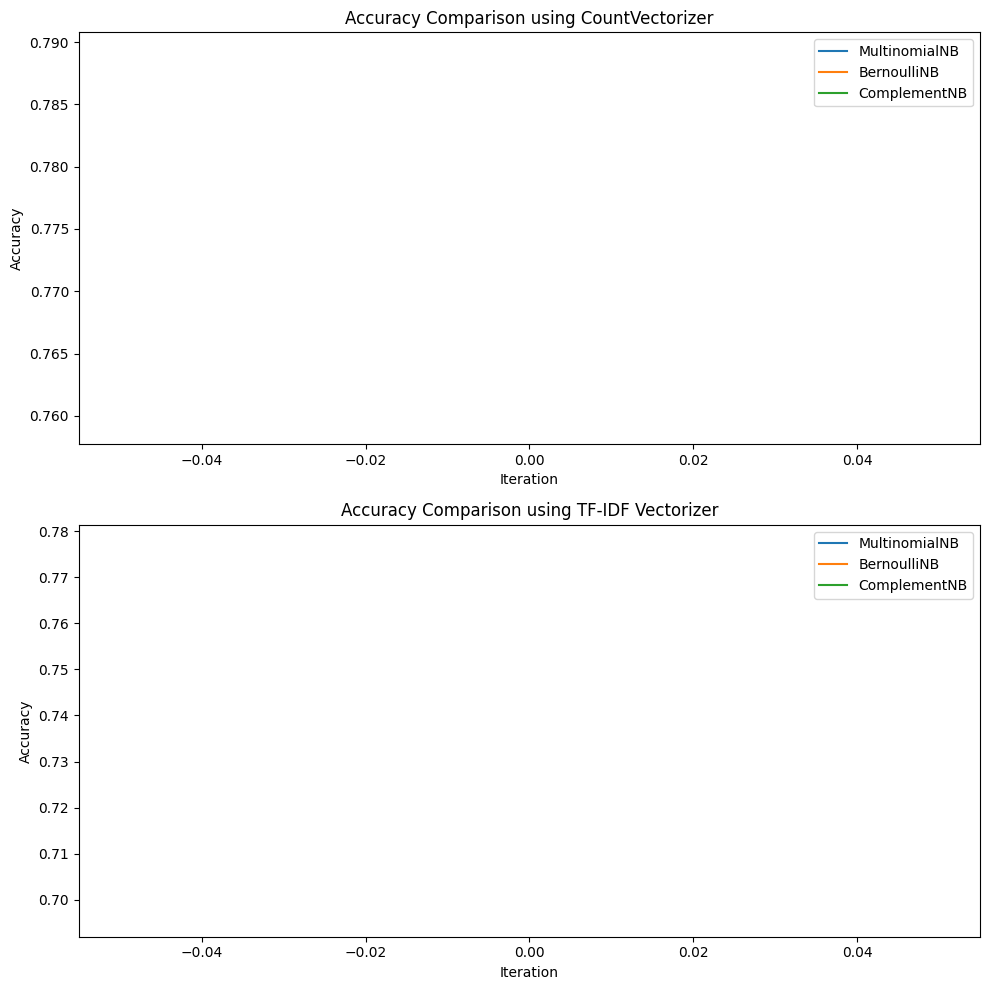

In [1]:
# Install necessary libraries
!pip install pandas scikit-learn matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Download NLTK resources
import nltk
nltk.download('stopwords')

# Load the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to the dataset on your Google Drive
dataset_path = '/content/drive/MyDrive/MSDS/ML/Sentiment Analysis/Naive bayes/kaggle airline tweets data set/Tweets.csv'
# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)

# Text preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove '@' and '#' symbols
    text = re.sub(r'[@#]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Apply stemming
    text = ' '.join([ps.stem(word) for word in text.split()])

    return text

# Apply preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Preprocess the data
# For simplicity, we'll use only the 'text' column for sentiment analysis
X = df['text']
y = df['airline_sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizers
vectorizers = [CountVectorizer(), TfidfVectorizer()]
vectorizer_names = ['CountVectorizer', 'TF-IDF Vectorizer']

# Naive Bayes models
nb_models = [MultinomialNB(), BernoulliNB(), ComplementNB()]
nb_model_names = ['MultinomialNB', 'BernoulliNB', 'ComplementNB']

# Initialize dictionaries to store accuracy results
accuracy_results = {vectorizer_name: {nb_model_name: [] for nb_model_name in nb_model_names} for vectorizer_name in vectorizer_names}

# Loop over vectorizers
for vectorizer, vectorizer_name in zip(vectorizers, vectorizer_names):
    # Vectorize the data
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Loop over Naive Bayes models
    for nb_model, nb_model_name in zip(nb_models, nb_model_names):
        # Train the Naive Bayes model
        if isinstance(nb_model, GaussianNB):
            nb_model.fit(X_train_vectorized.toarray(), y_train)
        else:
            nb_model.fit(X_train_vectorized, y_train)

        # Make predictions on the test set
        predictions = nb_model.predict(X_test_vectorized)

        # Calculate accuracy and store the result
        accuracy = accuracy_score(y_test, predictions)
        accuracy_results[vectorizer_name][nb_model_name].append(accuracy)

# Plotting the results
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for i, vectorizer_name in enumerate(vectorizer_names):
    for nb_model_name in nb_model_names:
        axes[i].plot(accuracy_results[vectorizer_name][nb_model_name], label=nb_model_name)

    axes[i].set_title(f'Accuracy Comparison using {vectorizer_name}')
    axes[i].set_xlabel('Iteration')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()

plt.tight_layout()
plt.show()
